In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#!pip install git+https://www.github.com/keras-team/keras-contrib.git
#!pip install git+https://www.github.com/keras-team/keras-contrib.git
import nibabel as nib
from skimage import transform
from numpy import array
from keras.utils import to_categorical
import pickle
import matplotlib.pyplot as plt
import os
import pickle
import keras
from functools import partial
from sklearn.model_selection import train_test_split

from keras.layers import Input, LeakyReLU, Add, UpSampling3D, Activation, SpatialDropout3D
from keras.engine import Model
from keras.optimizers import Adam
from keras.optimizers import RMSprop

import pandas as pd

import numpy as np
from keras import backend as K
from keras.engine import Input, Model
from keras.layers import Conv3D, MaxPooling3D, UpSampling3D, Activation, BatchNormalization, PReLU, Deconvolution3D, Flatten, Dense, GlobalAveragePooling3D

import tensorflow as tf

# K.set_image_dim_ordering('th')  #"th" format means that the convolutional kernels will have the shape (depth, input_depth, rows, cols)
#K.set_image_dim_ordering('tf')    #"tf" format means that the convolutional kernels will have the shape (rows, cols, input_depth, depth)
#K.set_image_data_format('channels_first')

try:
    from keras.engine import merge
except ImportError:
    from keras.layers.merge import concatenate

from tensorflow.python.client import device_lib
#print(device_lib.list_local_devices())
print(len(device_lib.list_local_devices()))

from keras.models import *
from keras.layers import *
from keras.layers import Input,InputLayer, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv3D,add
from keras.models import Sequential,Model
from keras.optimizers import SGD,Adam
from keras.callbacks import ModelCheckpoint,LearningRateScheduler
from keras.regularizers import l2,l1,l1_l2
import keras



ERROR! Session/line number was not unique in database. History logging moved to new session 61


Using TensorFlow backend.


2


(1, 240, 240, 155)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  after removing the cwd from sys.path.


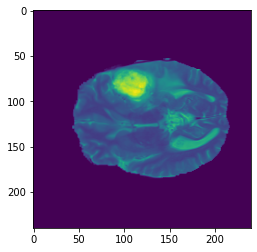

In [ ]:
train_data=[]
import nibabel as nib
newimage = nib.load('/content/drive/My Drive/Colab Notebooks/Brats2019/MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_2013_10_1/BraTS19_2013_10_1_t2.nii.gz')
data = newimage.get_data()
train_data.append(data)
newimage1=array(train_data)
print(newimage1.shape)
plt.imshow(newimage1[0,:,:,70])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  after removing the cwd from sys.path.


(1, 240, 240, 155)


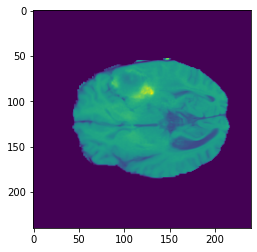

In [ ]:
train_data=[]
import nibabel as nib
newimage = nib.load('/content/drive/My Drive/Colab Notebooks/Brats2019/MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_2013_10_1/BraTS19_2013_10_1_t1.nii.gz')
data = newimage.get_data()
train_data.append(data)
newimage1=array(train_data)
print(newimage1.shape)
plt.imshow(newimage1[0,:,:,70])

# **Gaussain Filter**

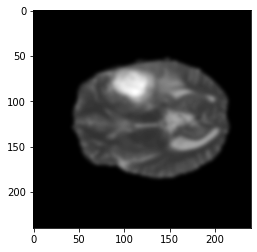

In [ ]:
from scipy.ndimage import gaussian_filter
result = gaussian_filter(newimage1[0,:,:,70], sigma=2)
plt.imshow(result)

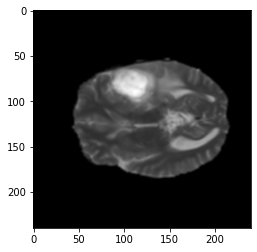

In [ ]:
import cv2
kernel = np.ones((5,5),np.float32)/25
blur = cv2.GaussianBlur(newimage1[0,:,:,70],(3,3),2)
plt.imshow(blur)

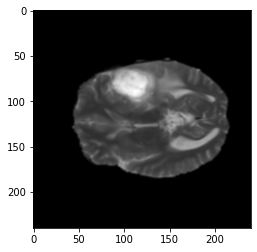

In [ ]:
gau = cv2.GaussianBlur(newimage1[0,:,:,70],(3,3),0)
plt.imshow(gau)

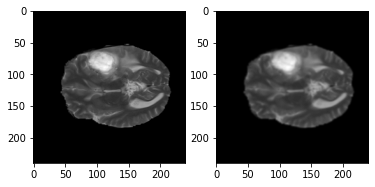

In [ ]:
from scipy import misc
import matplotlib.pyplot as plt
fig = plt.figure()
#plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
ascent = misc.ascent()
result = gaussian_filter(newimage1[0,:,:,70], sigma=1)
ax1.imshow(newimage1[0,:,:,70])
ax2.imshow(result)
plt.show()

# **Median Filtering**

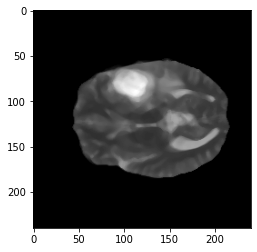

In [ ]:
from scipy.ndimage import gaussian_filter
median = cv2.medianBlur(newimage1[0,:,:,70],5)
plt.imshow(median)

# **Average Filtering**

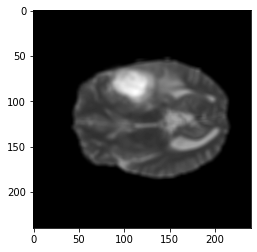

In [ ]:
average= cv2.blur(newimage1[0,:,:,70],(5,5))
plt.imshow(average)

# **Sharpening**

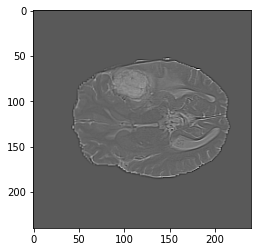

In [ ]:
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
im = cv2.filter2D(newimage1[0,:,:,70], -1, kernel)
plt.imshow(im)

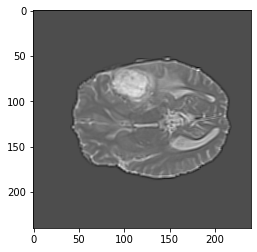

In [ ]:
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
im = cv2.filter2D(blur, -1, kernel)
plt.imshow(im)

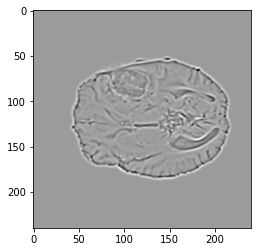

In [ ]:
kernel = np.array([[0,1,0], [1,-4,1], [0,1,0]])
im = cv2.filter2D(result, -1, kernel)
plt.imshow(im)

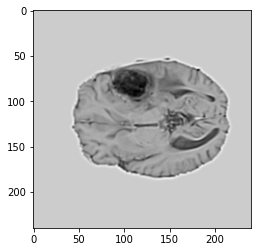

In [ ]:
kernel = np.array([[1,1,1], [1,-9,1], [1,1,1]])
im = cv2.filter2D(result, -1, kernel)
plt.imshow(im)

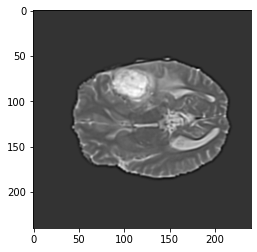

In [ ]:
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
im = cv2.filter2D(result, -1, kernel)
plt.imshow(im)

# **Laplacian on Gaussian**

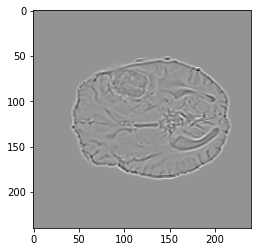

In [ ]:
laplacian = cv2.Laplacian(blur,cv2.CV_64F)
plt.imshow(laplacian)

# **Laplacian on Median**

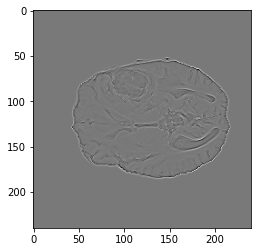

In [ ]:
laplacian = cv2.Laplacian(median,cv2.CV_64F)
plt.imshow(laplacian)

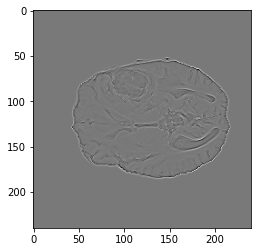

In [ ]:
kernel = np.array([[0,1,0], [1,-4,1], [0,1,0]])
im = cv2.filter2D(median, -1, kernel)
plt.imshow(im)

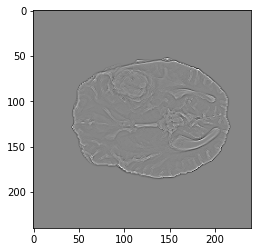

In [ ]:
kernel = np.array([[0,-1,0], [-1,4,-1], [0,-1,0]])
im = cv2.filter2D(median, -1, kernel)
plt.imshow(im)

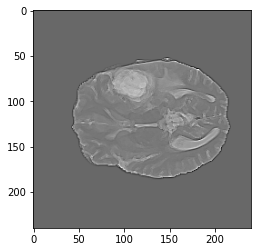

In [ ]:
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
im = cv2.filter2D(median, -1, kernel)
plt.imshow(im)

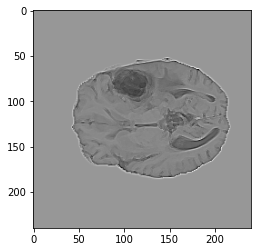

In [ ]:
kernel = np.array([[1,1,1], [1,-9,1], [1,1,1]])
im = cv2.filter2D(median, -1, kernel)
plt.imshow(im)

# **Laplacian on Average**

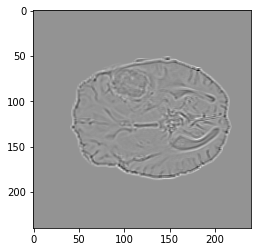

In [ ]:
laplacian = cv2.Laplacian(average,cv2.CV_64F)
plt.imshow(laplacian)


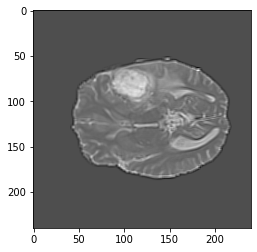

In [ ]:
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
im = cv2.filter2D(average, -1, kernel)
plt.imshow(im)

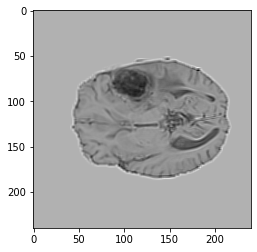

In [ ]:
kernel = np.array([[1,1,1], [1,-9,1], [1,1,1]])
im = cv2.filter2D(average, -1, kernel)
plt.imshow(im)

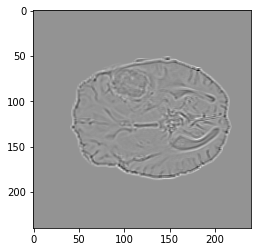

In [ ]:
kernel = np.array([[0,1,0], [1,-4,1], [0,1,0]])
im = cv2.filter2D(average, -1, kernel)
plt.imshow(im)

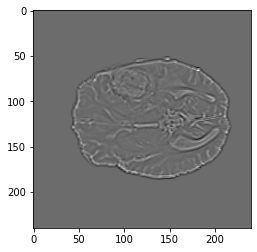

In [ ]:
kernel = np.array([[0,-1,0], [-1,4,-1], [0,-1,0]])
im = cv2.filter2D(average, -1, kernel)
plt.imshow(im)

# **Sobel on Gaussian**

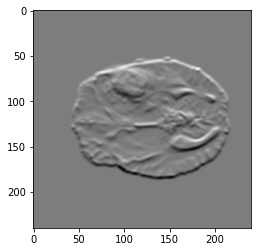

In [ ]:
sobelx = cv2.Sobel(blur,cv2.CV_64F,1,0,ksize=5)  # x
plt.imshow(sobelx)


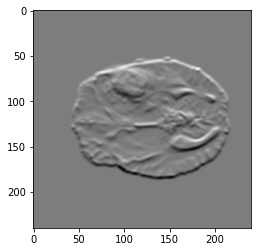

In [ ]:
sobely = cv2.Sobel(blur,cv2.CV_64F,0,1,ksize=5)  # y
plt.imshow(sobely)

# **Sobel on Average**

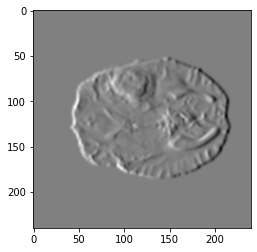

In [ ]:
sobelx = cv2.Sobel(average,cv2.CV_64F,1,0,ksize=5)  # x
plt.imshow(sobelx)


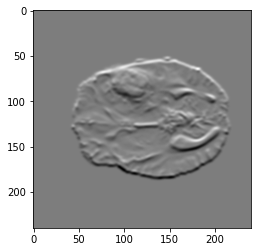

In [ ]:
sobely = cv2.Sobel(average,cv2.CV_64F,0,1,ksize=5)  # y
plt.imshow(sobely)

# **Sobel on Median**

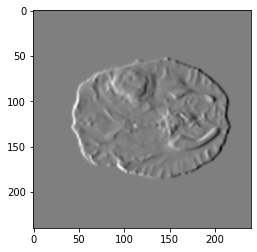

In [ ]:
sobelx = cv2.Sobel(median,cv2.CV_64F,1,0,ksize=5)  # x
plt.imshow(sobelx)

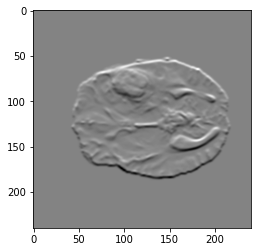

In [ ]:
sobely = cv2.Sobel(median,cv2.CV_64F,0,1,ksize=5)  # y
plt.imshow(sobely)

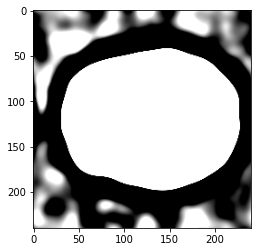

In [ ]:
import scipy,skimage
from skimage import color, data, restoration
psf = np.ones((5,5)) / 25
img6 = scipy.signal.convolve2d(newimage1[0,:,:,70],psf,'same')
img6 += 0.1 * img6.std() * np.random.standard_normal(img6.shape)
Wiener_filtered = restoration.wiener(img6,psf,1100) 
plt.imshow(Wiener_filtered)


# **Unsharp Filter**

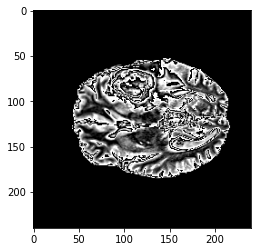

In [ ]:
from PIL import Image, ImageFilter
image = Image.fromarray(newimage1[0,:,:,70].astype('uint8'))
new_image = image.filter(ImageFilter.UnsharpMask(radius=2, percent=150))
plt.imshow(new_image)
